In [1]:
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
year_to_date_arrest_data = pd.read_csv("resources/NYPD_Arrest_Data__Year_to_Date_.csv")
year_to_date_arrest_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,70,0,25-44,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005)
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,0,45-64,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003)
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,48,0,25-44,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005)


In [4]:
covid_data = pd.read_csv("resources/data_Covid.csv")
covid_df = covid_data[["DATE_OF_INTEREST","Cases"]]
covid_df['DATE_OF_INTEREST'] = pd.to_datetime(covid_df['DATE_OF_INTEREST'])
covid_df.head()

,DATE_OF_INTEREST,Cases
0,2020-02-29,1
1,2020-03-01,0
2,2020-03-02,0
3,2020-03-03,2
4,2020-03-04,5


In [5]:
year_to_date_arrest_df = year_to_date_arrest_data[["ARREST_DATE","OFNS_DESC","ARREST_BORO","AGE_GROUP","PERP_SEX"]]

In [6]:
year_to_date_arrest_df['ARREST_BORO'].mask(year_to_date_arrest_df['ARREST_BORO'] == 'K', 'Brooklyn', inplace=True)
year_to_date_arrest_df['ARREST_BORO'].mask(year_to_date_arrest_df['ARREST_BORO'] == 'M', 'Manhattan', inplace=True)
year_to_date_arrest_df['ARREST_BORO'].mask(year_to_date_arrest_df['ARREST_BORO'] == 'Q', 'Queens', inplace=True)
year_to_date_arrest_df['ARREST_BORO'].mask(year_to_date_arrest_df['ARREST_BORO'] == 'B', 'Bronx', inplace=True)
year_to_date_arrest_df['ARREST_BORO'].mask(year_to_date_arrest_df['ARREST_BORO'] == 'S', 'Staten Island', inplace=True)
year_to_date_arrest_df.head()

,ARREST_DATE,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX
0,06/18/2020,FELONY ASSAULT,Brooklyn,18-24,F
1,03/04/2020,OTHER TRAFFIC INFRACTION,Manhattan,25-44,M
2,02/07/2020,DANGEROUS DRUGS,Brooklyn,25-44,M
3,01/17/2020,OFF. AGNST PUB ORD SENSBLTY &,Queens,45-64,M
4,06/23/2020,FELONY ASSAULT,Bronx,25-44,M


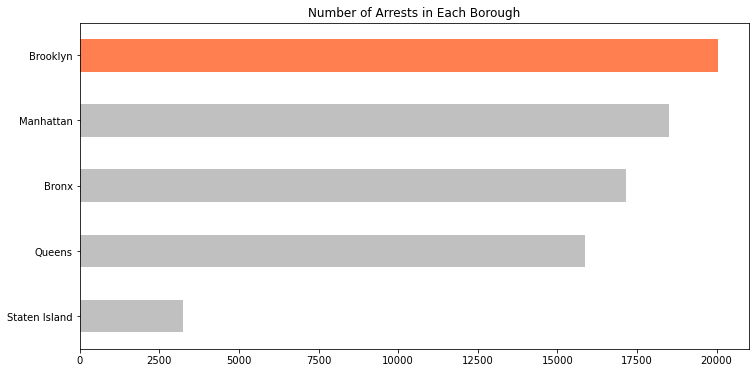

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
pd.value_counts(year_to_date_arrest_df["ARREST_BORO"]).sort_values().plot(kind="barh",color=['silver', 'silver', 'silver', 'silver', 'coral'])
plt.title('Number of Arrests in Each Borough')
plt.show()

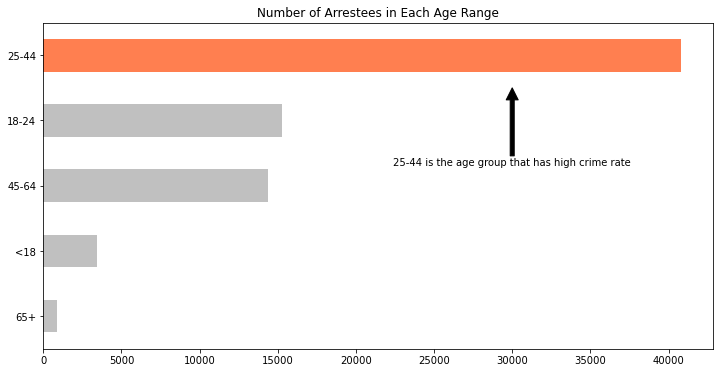

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
pd.value_counts(year_to_date_arrest_df["AGE_GROUP"]).sort_values().plot(kind="barh", color=['silver', 'silver', 'silver', 'silver', 'coral'])
ax.annotate('25-44 is the age group that has high crime rate',
            xy=(30000, 3.5), xycoords='data',
            xytext=(0, -80), textcoords='offset points',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='center', verticalalignment='bottom')
plt.title('Number of Arrestees in Each Age Range')
plt.show()

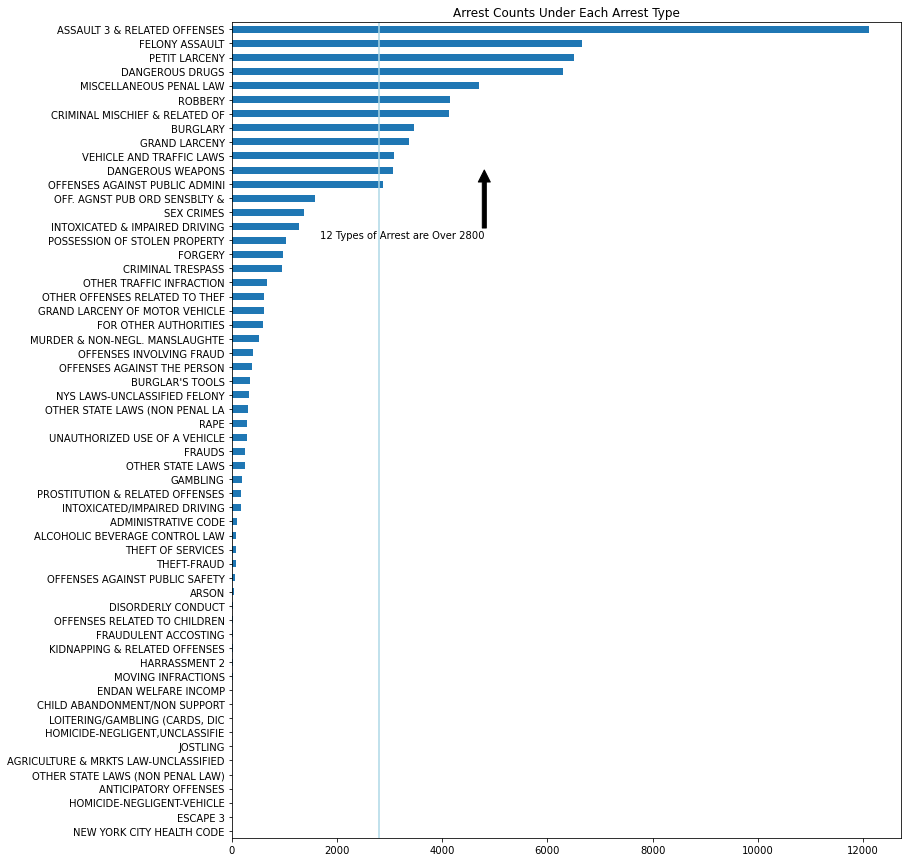

In [9]:
fig, ax = plt.subplots(figsize=(12,15))
pd.value_counts(year_to_date_arrest_df["OFNS_DESC"]).sort_values().plot(kind="barh")
plt.axvline(x=2800,color='lightblue')
plt.title('Arrest Counts Under Each Arrest Type')
ax.annotate('12 Types of Arrest are Over 2800',
            xy=(4800, 47), xycoords='data',
            xytext=(0, -70), textcoords='offset points',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='bottom')
plt.show() 

In [10]:
df = year_to_date_arrest_df.loc[(year_to_date_arrest_df["OFNS_DESC"]=="ASSAULT 3 & RELATED OFFENSES") | (year_to_date_arrest_df["OFNS_DESC"]=="FELONY ASSAULT")
                                | (year_to_date_arrest_df["OFNS_DESC"]=="PETIT LARCENY") | (year_to_date_arrest_df["OFNS_DESC"]=="DANGEROUS DRUGS")
                                | (year_to_date_arrest_df["OFNS_DESC"]=="MISCELLANEOUS PENAL LAW") | (year_to_date_arrest_df["OFNS_DESC"]=="ROBBERY")
                                | (year_to_date_arrest_df["OFNS_DESC"]=="CRIMINAL MISCHIEF & RELATED OF") | (year_to_date_arrest_df["OFNS_DESC"]=="BURGLARY")
                                | (year_to_date_arrest_df["OFNS_DESC"]=="GRAND LARCENY") | (year_to_date_arrest_df["OFNS_DESC"]=="VEHICLE AND TRAFFIC LAWS")
                                | (year_to_date_arrest_df["OFNS_DESC"]=="DANGEROUS WEAPONS") | (year_to_date_arrest_df["OFNS_DESC"]=="OFFENSES AGAINST PUBLIC ADMINI"),:]
                                

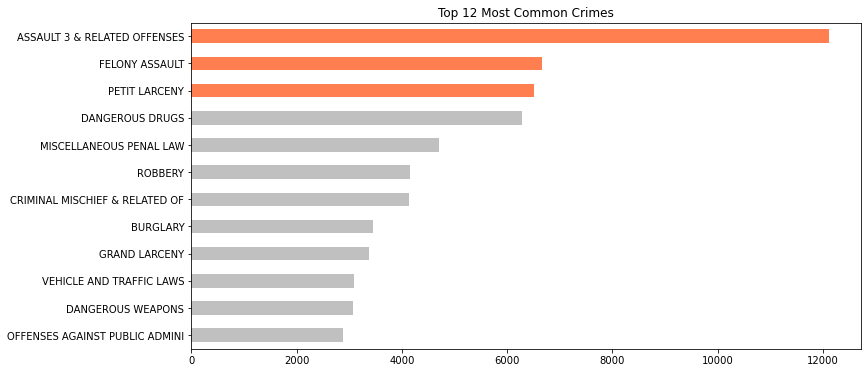

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
pd.value_counts(df["OFNS_DESC"]).sort_values().plot(kind="barh", color=['silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver','silver','coral','coral', 'coral'])
plt.title('Top 12 Most Common Crimes')
plt.show()

In [12]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['COUNT'] = 1

In [13]:
covid_df_Jul = covid_df.loc[covid_df['DATE_OF_INTEREST']<'2020-07-02',:]

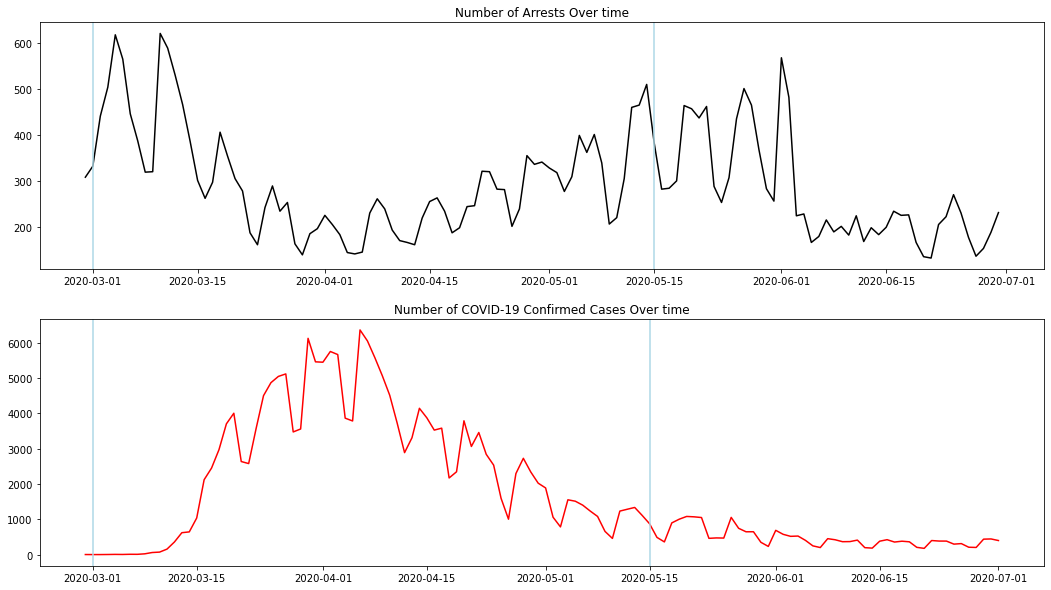

In [14]:
df_Feb = df.loc[df['ARREST_DATE']>'2020-02-28',:]

fig, axs = plt.subplots(2, 1, figsize=(18,10))
(ax1, ax2) = axs

ax1.plot(df_Feb.groupby(['ARREST_DATE'])['COUNT'].sum(), color='black')
ax1.axvline(pd.Timestamp('2020-03-01'),color='lightblue')
ax1.axvline(pd.Timestamp('2020-05-15'),color='lightblue')
ax1.set_title("Number of Arrests Over time")

ax2.plot(covid_df_Jul.groupby(['DATE_OF_INTEREST'])['Cases'].sum(), color='red')
ax2.axvline(pd.Timestamp('2020-03-01'),color='lightblue')
ax2.axvline(pd.Timestamp('2020-05-15'),color='lightblue')
ax2.set_title("Number of COVID-19 Confirmed Cases Over time")
plt.show()

In [15]:
df_ASSAULT = df.loc[(df["OFNS_DESC"]=="ASSAULT 3 & RELATED OFFENSES")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_ASSAULT["COUNT"] = 1
df_FELONY = df.loc[(df["OFNS_DESC"]=="FELONY ASSAULT")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_FELONY["COUNT"] = 1
df_PETIT = df.loc[(df["OFNS_DESC"]=="PETIT LARCENY")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_PETIT["COUNT"] = 1
df_DRUGS = df.loc[(df["OFNS_DESC"]=="DANGEROUS DRUGS")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_DRUGS["COUNT"] = 1
df_MISCELLANEOUS = df.loc[(df["OFNS_DESC"]=="MISCELLANEOUS PENAL LAW")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_MISCELLANEOUS["COUNT"] = 1
df_ROBBERY = df.loc[(df["OFNS_DESC"]=="ROBBERY")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_ROBBERY["COUNT"] = 1
df_CRIMINAL = df.loc[(df["OFNS_DESC"]=="CRIMINAL MISCHIEF & RELATED OF")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_CRIMINAL["COUNT"] = 1
df_BURGLARY = df.loc[(df["OFNS_DESC"]=="BURGLARY")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_BURGLARY["COUNT"] = 1
df_LARCENY = df.loc[(df["OFNS_DESC"]=="GRAND LARCENY")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_LARCENY["COUNT"] = 1
df_VEHICLE = df.loc[(df["OFNS_DESC"]=="VEHICLE AND TRAFFIC LAWS")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_VEHICLE["COUNT"] = 1
df_WEAPONS = df.loc[(df["OFNS_DESC"]=="DANGEROUS WEAPONS")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_WEAPONS["COUNT"] = 1
df_ADMINI = df.loc[(df["OFNS_DESC"]=="OFFENSES AGAINST PUBLIC ADMINI")&(df['ARREST_DATE']>'2020-03-01')&(df['ARREST_DATE']<'2020-05-15'),:]
df_ADMINI["COUNT"] = 1

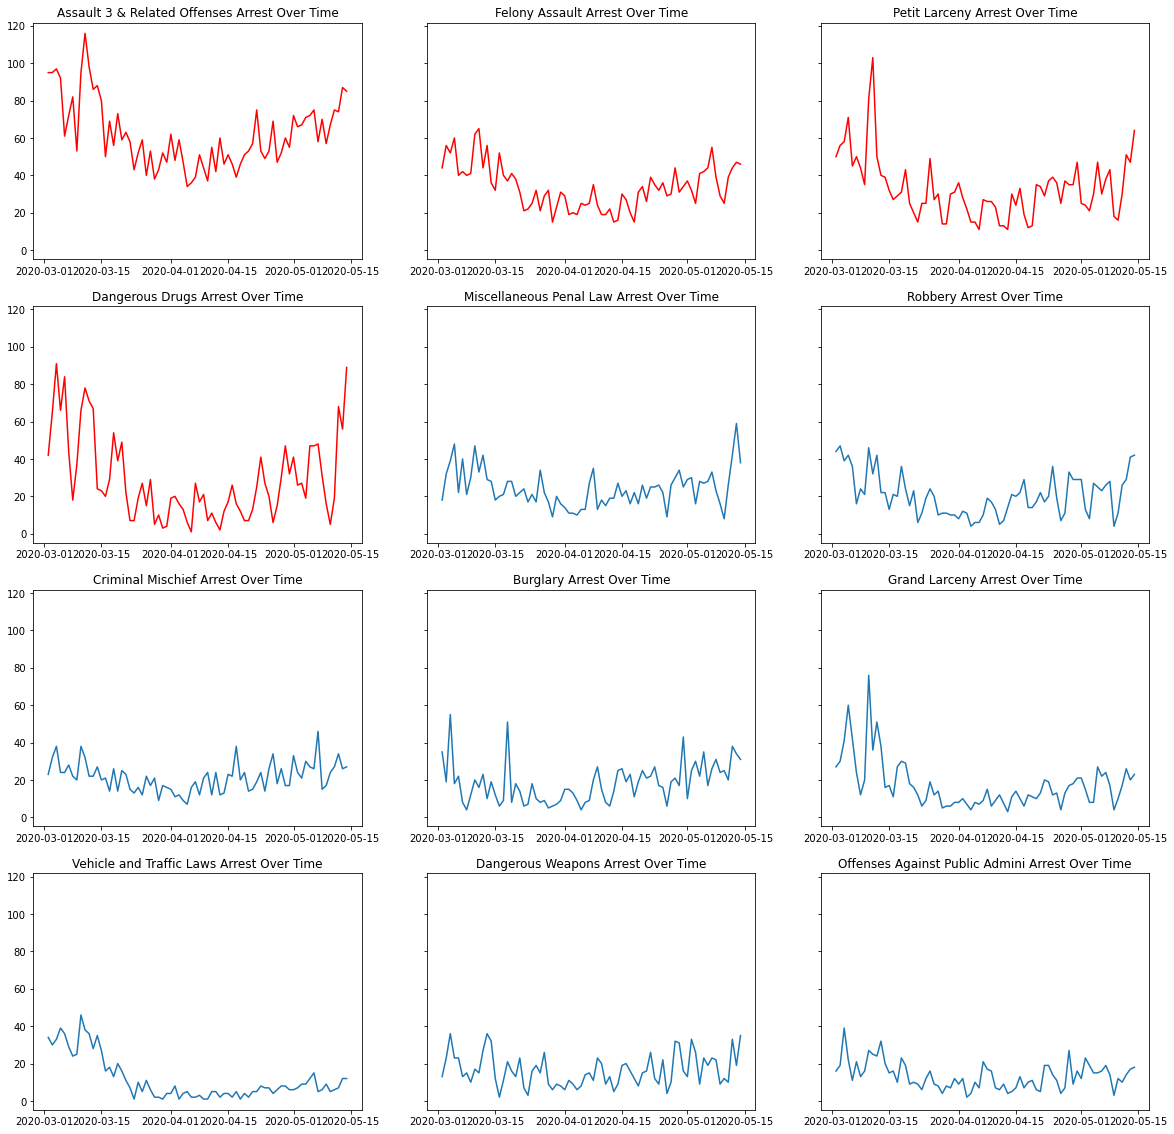

In [16]:
fig, axs = plt.subplots(4, 3, sharey=True, figsize=(20,20))
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12) = axs

ax1.plot(df_ASSAULT.groupby(['ARREST_DATE'])['COUNT'].sum(), color='red')
ax1.set_title('Assault 3 & Related Offenses Arrest Over Time')

ax2.plot(df_FELONY.groupby(['ARREST_DATE'])['COUNT'].sum(), color='red')
ax2.set_title('Felony Assault Arrest Over Time')

ax3.plot(df_PETIT.groupby(['ARREST_DATE'])['COUNT'].sum(), color='red')
ax3.set_title('Petit Larceny Arrest Over Time')

ax4.plot(df_DRUGS.groupby(['ARREST_DATE'])['COUNT'].sum(), color='red')
ax4.set_title('Dangerous Drugs Arrest Over Time')

ax5.plot(df_MISCELLANEOUS.groupby(['ARREST_DATE'])['COUNT'].sum())
ax5.set_title('Miscellaneous Penal Law Arrest Over Time')

ax6.plot(df_ROBBERY.groupby(['ARREST_DATE'])['COUNT'].sum())
ax6.set_title('Robbery Arrest Over Time')

ax7.plot(df_CRIMINAL.groupby(['ARREST_DATE'])['COUNT'].sum())
ax7.set_title('Criminal Mischief Arrest Over Time')

ax8.plot(df_BURGLARY.groupby(['ARREST_DATE'])['COUNT'].sum())
ax8.set_title('Burglary Arrest Over Time')

ax9.plot(df_LARCENY.groupby(['ARREST_DATE'])['COUNT'].sum())
ax9.set_title('Grand Larceny Arrest Over Time')

ax10.plot(df_VEHICLE.groupby(['ARREST_DATE'])['COUNT'].sum())
ax10.set_title('Vehicle and Traffic Laws Arrest Over Time')

ax11.plot(df_WEAPONS.groupby(['ARREST_DATE'])['COUNT'].sum())
ax11.set_title('Dangerous Weapons Arrest Over Time')

ax12.plot(df_ADMINI.groupby(['ARREST_DATE'])['COUNT'].sum())
ax12.set_title('Offenses Against Public Admini Arrest Over Time')
plt.show()

In [17]:
df_arrest_Feb = df_Feb[["ARREST_DATE","COUNT"]]
df_arrest_Feb

,ARREST_DATE,COUNT
0,2020-06-18,1
4,2020-06-23,1
5,2020-05-27,1
7,2020-03-10,1
8,2020-06-13,1
...,...,...
74777,2020-06-22,1
74778,2020-05-22,1
74779,2020-03-19,1
74780,2020-03-02,1


In [18]:
arrest_df_Jul = df_arrest_Feb.groupby(['ARREST_DATE'])['COUNT'].sum().reset_index("ARREST_DATE")
arrest_df_Jul

,ARREST_DATE,COUNT
0,2020-02-29,308
1,2020-03-01,332
2,2020-03-02,441
3,2020-03-03,504
4,2020-03-04,618
...,...,...
118,2020-06-26,177
119,2020-06-27,136
120,2020-06-28,153
121,2020-06-29,188


In [19]:
covid_df_Jul

,DATE_OF_INTEREST,Cases
0,2020-02-29,1
1,2020-03-01,0
2,2020-03-02,0
3,2020-03-03,2
4,2020-03-04,5
...,...,...
119,2020-06-27,208
120,2020-06-28,202
121,2020-06-29,437
122,2020-06-30,443


In [20]:
combined_df = pd.merge(covid_df_Jul, arrest_df_Jul, how='inner', left_on='DATE_OF_INTEREST', right_on='ARREST_DATE')
combined_df=combined_df[["DATE_OF_INTEREST","Cases","COUNT"]]
combined_df = combined_df.rename(columns={'DATE_OF_INTEREST': 'Date', 'Cases': 'Covid Positive', 'COUNT': 'Arrest Cases'})
combined_df.head()

,Date,Covid Positive,Arrest Cases
0,2020-02-29,1,308
1,2020-03-01,0,332
2,2020-03-02,0,441
3,2020-03-03,2,504
4,2020-03-04,5,618


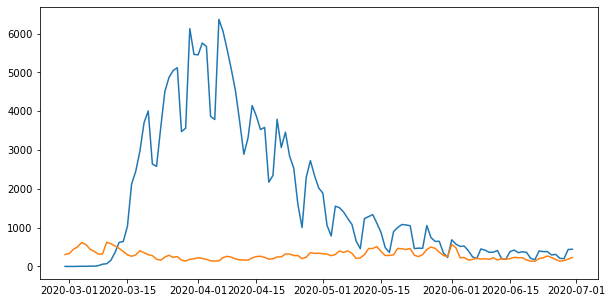

In [21]:
fig, axs = plt.subplots(figsize=(10,5))
plt.plot(combined_df['Date'], combined_df['Covid Positive'])
plt.plot(combined_df['Date'], combined_df['Arrest Cases'])
plt.show()

In [22]:
combined_corr_df = combined_df[["Covid Positive","Arrest Cases"]]
combined_corr_df

,Covid Positive,Arrest Cases
0,1,308
1,0,332
2,0,441
3,2,504
4,5,618
...,...,...
118,311,177
119,208,136
120,202,153
121,437,188


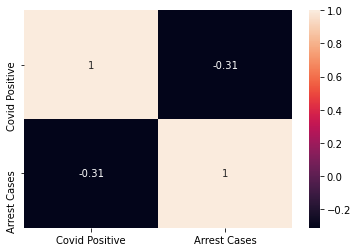

In [30]:
sns.heatmap(combined_corr_df.corr(), annot = True)